In [1]:
import numpy as np
import os
import random
import torch

from torch.utils.data import DataLoader, random_split

from Callbacks import EarlyStopping
from TransferLearningModel import TransferLearningModel
from utils import DICOMCoarseDataset, TransformDataset

In [2]:
scenario = 1
data_augmentation = False

In [3]:
BASE_DIR = "C:/Users/Dominik Hahn/OneDrive/Studium/Master/Masterarbeit/Daten"
# BASE_DIR = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Daten"
seed = 41
batch_size = 32
classes = ["nodule", "non-nodule"]
train_ratio = 0.6

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

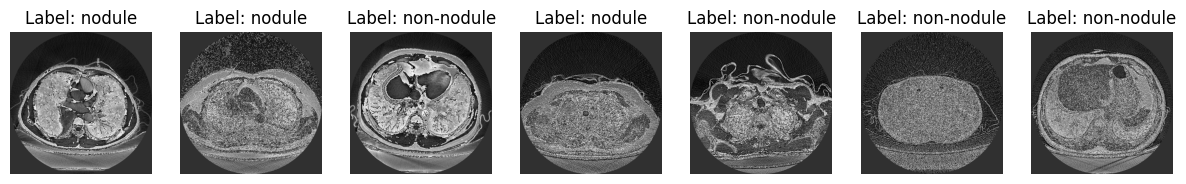

In [4]:
dataset = DICOMCoarseDataset(root_dir=BASE_DIR, num_images_per_class=len(os.listdir(os.path.join(BASE_DIR, "nodule"))), classes=classes, scenario=scenario)
# dataset = DICOMCoarseDataset(root_dir=BASE_DIR, num_images_per_class=10, classes=classes, scenario=scenario)
dataset.visualize_images(num_images=7)

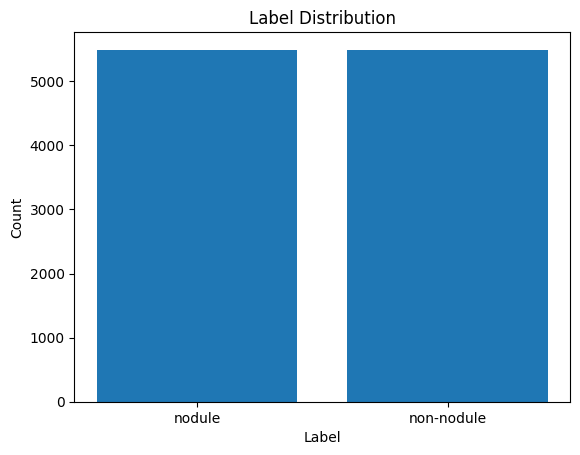

In [5]:
dataset.display_label_distribution()

In [6]:
train_size = int(train_ratio * len(dataset))
val_size = int(((1-train_ratio)/2) * len(dataset)) 
test_size = len(dataset) - train_size - val_size

print(f"Train size: {train_size} --- Validation size: {val_size} --- Test size: {test_size}")

Train size: 6591 --- Validation size: 2197 --- Test size: 2198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9004807..2.4711628].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9458059..2.2796998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.960821..2.232609].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.061605..2.148662].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.972094..2.1527517].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8452158..1.4324414].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7920175..1.

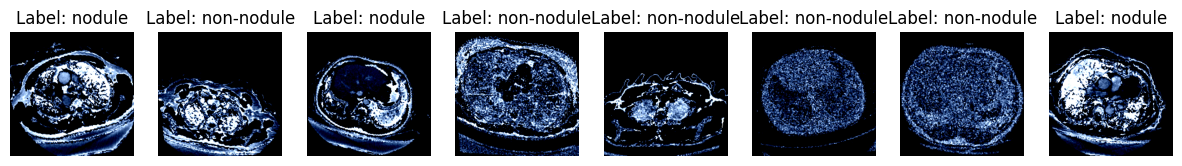

In [7]:
from utils import display_data_loader_batch
display_model = TransferLearningModel(classes, "unet", data_augmentation=True, fine=False, scenario=1)
display_model.train_transforms, display_model.test_transforms = display_model.get_transforms()
train_indices, val_indices, test_indices = random_split(dataset, [train_size, val_size, test_size])
train_dataset = TransformDataset(torch.utils.data.Subset(dataset, train_indices.indices), transform=display_model.train_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
display_data_loader_batch(train_loader, classes)

In [ ]:
model = TransferLearningModel(classes, "unet", data_augmentation=data_augmentation, fine=False, scenario=scenario)

# Ensure transforms are correctly applied based on model requirements
model.train_transforms, model.test_transforms = model.get_transforms()
train_indices, val_indices, test_indices = random_split(dataset, [train_size, val_size, test_size])

# Apply specific transforms to each subset
train_dataset = TransformDataset(torch.utils.data.Subset(dataset, train_indices.indices), transform=model.train_transforms)
val_dataset = TransformDataset(torch.utils.data.Subset(dataset, val_indices.indices), transform=model.test_transforms)
test_dataset = TransformDataset(torch.utils.data.Subset(dataset, test_indices.indices), transform=model.test_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize early stopping
early_stopping = EarlyStopping(patience=10)

# Train the current model
model.train(train_loader, val_loader, early_stopping, epochs=50)

tensor([[[[-1.2959, -1.2959, -1.2959,  ..., -1.2959, -1.2959, -1.2959],
          [-1.2959, -1.2959, -1.2959,  ..., -1.2959, -1.2959, -1.2959],
          [-1.2959, -1.2959, -1.2959,  ..., -1.2959, -1.2959, -1.2959],
          ...,
          [-1.2959, -1.2959, -1.2959,  ..., -1.2959, -1.2959, -1.2959],
          [-1.2959, -1.2959, -1.2959,  ..., -1.2959, -1.2959, -1.2959],
          [-1.2959, -1.2959, -1.2959,  ..., -1.2959, -1.2959, -1.2959]],

         [[-1.1954, -1.1954, -1.1954,  ..., -1.1954, -1.1954, -1.1954],
          [-1.1954, -1.1954, -1.1954,  ..., -1.1954, -1.1954, -1.1954],
          [-1.1954, -1.1954, -1.1954,  ..., -1.1954, -1.1954, -1.1954],
          ...,
          [-1.1954, -1.1954, -1.1954,  ..., -1.1954, -1.1954, -1.1954],
          [-1.1954, -1.1954, -1.1954,  ..., -1.1954, -1.1954, -1.1954],
          [-1.1954, -1.1954, -1.1954,  ..., -1.1954, -1.1954, -1.1954]],

         [[-0.9678, -0.9678, -0.9678,  ..., -0.9678, -0.9678, -0.9678],
          [-0.9678, -0.9678, -

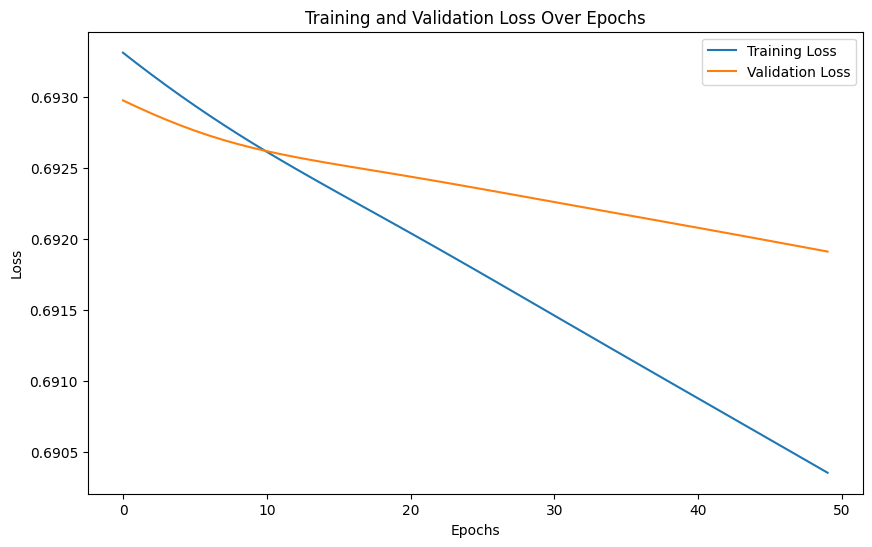

In [9]:
model.plot_loss()

Evaluation Accuracy on unseen data: 50.0


<Figure size 1000x800 with 0 Axes>

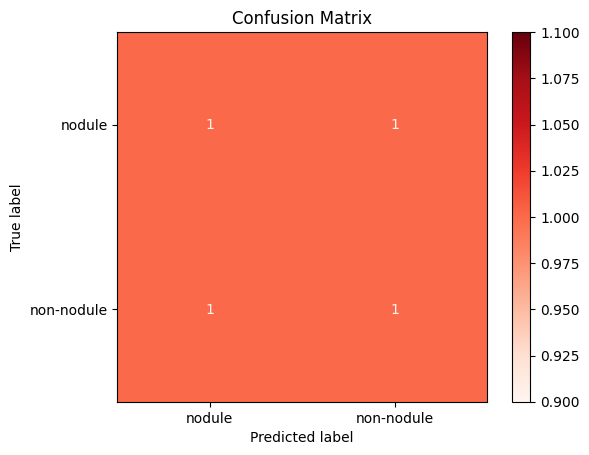

In [10]:
model.evaluate(test_loader)